In [1]:
# root directory
root_path = f"../../../../"

In [2]:
import pandas as pd

In [4]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/data/updated/dataset_mx_solvent_polarity.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(660, 65)


,mx,label,inchikey,gap_oh,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,...,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg,solvent,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,373.2,760.0,oxidane,True,False,False
1,Ti3C2,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,351.5,760.0,ethanol,True,False,False
2,Ti3C2,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,337.8,760.0,methanol,True,False,False
3,Ti3C2,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,329.3,760.0,propan-2-one,True,False,False
4,Ti3C2,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,0.0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,...,0,0,0,1,354.8,760.0,acetonitrile,True,False,False


In [5]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
df_mx_solvent_data_labeled['method_hf'] = df_mx_solvent_data_labeled['method_hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_licl/hf'] = df_mx_solvent_data_labeled['method_licl/hf'].astype('category').cat.codes
df_mx_solvent_data_labeled['method_lif/hcl'] = df_mx_solvent_data_labeled['method_lif/hcl'].astype('category').cat.codes

In [8]:
df_mx_solvent_data_labeled.head()

,mx,label,inchikey,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point,solvent,method_hf,method_licl/hf,method_lif/hcl
0,Ti3C2,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,1,1,0,1,0,373.2,oxidane,1,0,0
1,Ti3C2,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,1,1,0,3,0,351.5,ethanol,1,0,0
2,Ti3C2,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,1,1,0,2,0,337.8,methanol,1,0,0
3,Ti3C2,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,0,1,0,4,0,329.3,propan-2-one,1,0,0
4,Ti3C2,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,...,0,1,0,3,0,354.8,acetonitrile,1,0,0


In [9]:
df_mx_solvent_data_labeled.columns

Index(['mx', 'label', 'inchikey', 'work_function_oh', 'formation_energy_oh',
       'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
       'plasmafrequency_x_oh', 'plasmafrequency_y_oh',
       'has_inversion_symmetry_oh', 'gap_o', 'work_function_o',
       'formation_energy_o', 'ehull_o', 'alphax_el_o', 'alphay_el_o',
       'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
       'has_inversion_symmetry_o', 'work_function_f', 'formation_energy_f',
       'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f',
       'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'p', 'x_e', 'x_d', 'x_n',
       'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count',
       'h_bond_acceptor_count', 'rotatable_bond_count', 'heavy_atom_count',
       'atom_stereo_count', 'boiling_point', 'solvent', 'method_hf',
       'method_licl/hf', 'method_lif/hcl'],
      dtype='object')

In [10]:
features = ['work_function_oh', 'formation_energy_oh',
       'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
       'plasmafrequency_x_oh', 'plasmafrequency_y_oh',
       'has_inversion_symmetry_oh', 'gap_o', 'work_function_o',
       'formation_energy_o', 'ehull_o', 'alphax_el_o', 'alphay_el_o',
       'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
       'has_inversion_symmetry_o', 'work_function_f', 'formation_energy_f',
       'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f',
       'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f', 'p', 'x_e', 'x_d', 'x_n', 'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count',
       'h_bond_acceptor_count', 'rotatable_bond_count', 'heavy_atom_count',
       'atom_stereo_count', 'boiling_point', 'method_hf',
       'method_licl/hf', 'method_lif/hcl']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [11]:
X.head()

,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,alphaz_el_oh,plasmafrequency_x_oh,plasmafrequency_y_oh,has_inversion_symmetry_oh,gap_o,...,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point,method_hf,method_licl/hf,method_lif/hcl
0,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,0.0,1,1,0,1,0,373.2,1,0,0
1,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2.8,1,1,0,3,0,351.5,1,0,0
2,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,2.0,1,1,0,2,0,337.8,1,0,0
3,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,26.3,0,1,0,4,0,329.3,1,0,0
4,1.985656,-1.294839,0.123329,32.369286,32.369286,1.474909,5.064378,5.064378,0,0.477608,...,29.3,0,1,0,3,0,354.8,1,0,0


In [12]:
y.head()

0    1
1    1
2   -1
3   -1
4   -1
Name: label, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def plot_feature_distributions(data, features, title, plots_per_row=4):
    num_features = len(features)
    num_rows = (num_features + plots_per_row - 1) // plots_per_row
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(plots_per_row * 4, num_rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.histplot(data[feature], kde=True, ax=axes[i], bins=30, color='skyblue')
        axes[i].set_title(f"{title}: {feature}")

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

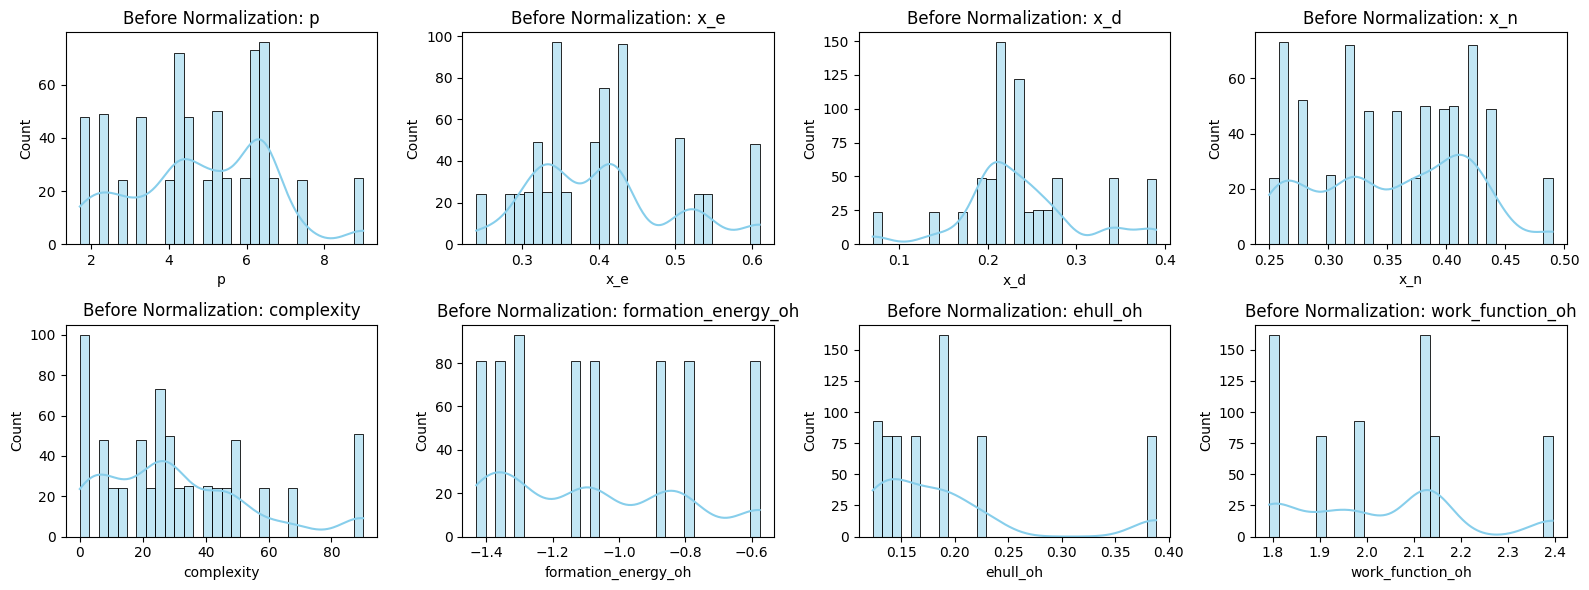

In [15]:
plot_feature = ['p', 'x_e', 'x_d', 'x_n', 'complexity',
   'formation_energy_oh','ehull_oh', 'work_function_oh']
plot_feature_distributions(X, plot_feature, "Before Normalization")

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

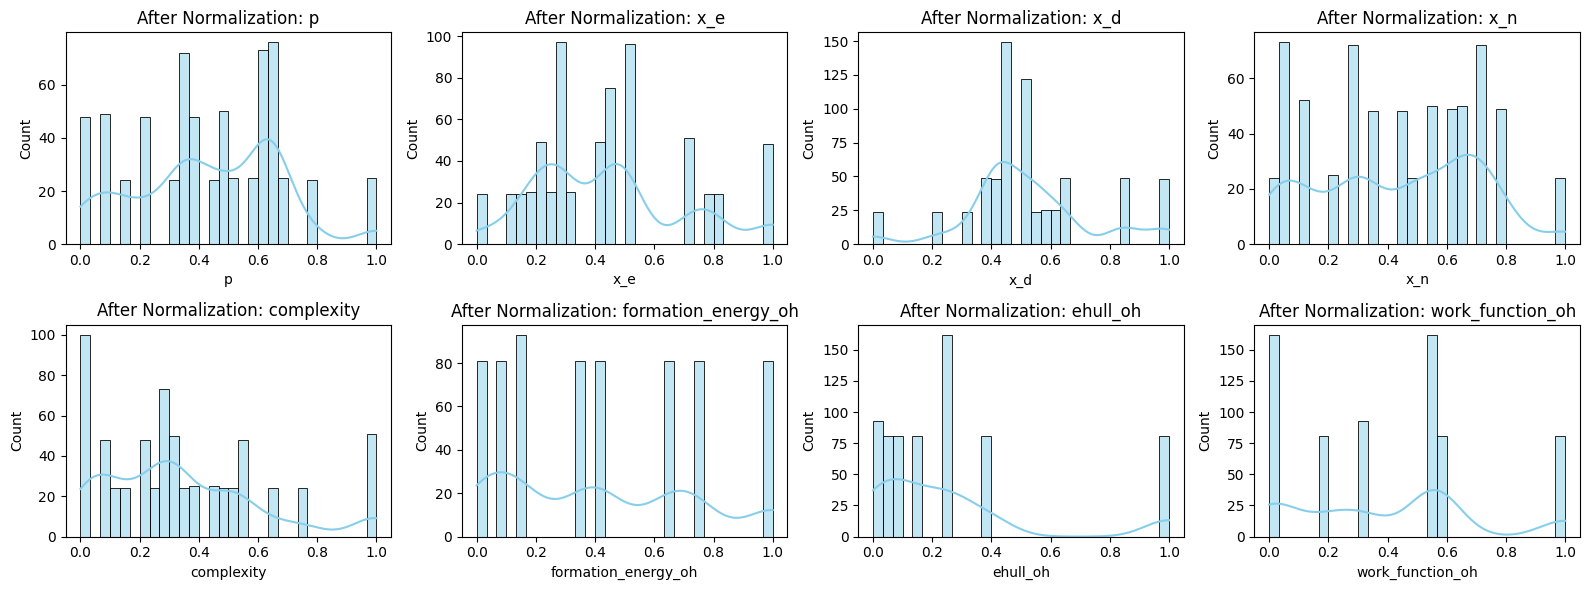

In [18]:
plot_feature_distributions(X_scaled_df, plot_feature, "After Normalization")

In [19]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [20]:
# PCA for inputs
pca = PCA(n_components=None, random_state=42)
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


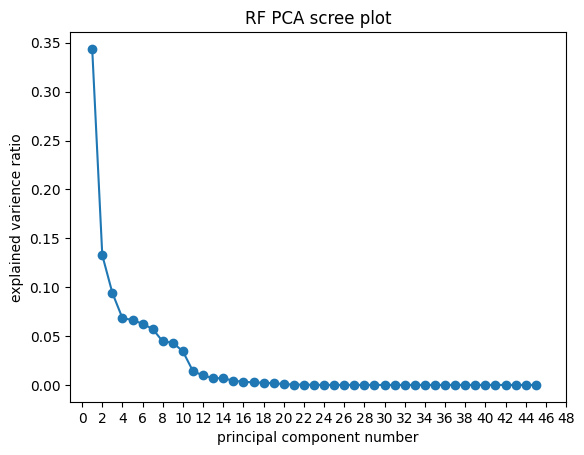

In [22]:
# scree plot
explained_variance = pca.explained_variance_ratio_
component_numbers = np.arange(len(explained_variance)) + 1
plt.plot(component_numbers, explained_variance, marker='o')
plt.xlabel('principal component number')
plt.ylabel('explained varience ratio')
plt.title('RF PCA scree plot')
plt.xticks(np.arange(0, 50, step=2))
plt.show()

In [34]:
pca = PCA(n_components=11, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [35]:
X_train = X_pca[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [36]:
X_test = X_pca[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [37]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [38]:
print(len(X_train_train))
print(len(X_val))
print(len(y_train_train))
print(len(y_val))

51
13
51
13


In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

In [40]:
param_dist = {
    'estimator__max_depth': randint(3, 10),
    'estimator__n_estimators': randint(50, 200),
    'estimator__max_features':  ['sqrt', 'log2', None],
    'estimator__min_samples_split': randint(2, 10),
    'estimator__max_leaf_nodes': randint(3, 10)
}

In [41]:
base_rf = RandomForestClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=base_rf, random_state=42)

In [42]:
rand_search = RandomizedSearchCV(bagging_clf, param_dist, cv=5, n_jobs=1, scoring='accuracy', verbose=2)
rand_search.fit(X_train_train, y_train_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__max_leaf_nodes=5, estimator__min_samples_split=8, estimator__n_estimators=104; total time=   1.5s
[CV] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__max_leaf_nodes=5, estimator__min_samples_split=8, estimator__n_estimators=104; total time=   1.4s
[CV] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__max_leaf_nodes=5, estimator__min_samples_split=8, estimator__n_estimators=104; total time=   1.3s
[CV] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__max_leaf_nodes=5, estimator__min_samples_split=8, estimator__n_estimators=104; total time=   1.3s
[CV] END estimator__max_depth=5, estimator__max_features=sqrt, estimator__max_leaf_nodes=5, estimator__min_samples_split=8, estimator__n_estimators=104; total time=   1.3s
[CV] END estimator__max_depth=5, estimator__max_features=None, estimator__max_l

,estimator,BaggingClassi...ndom_state=42)
,param_distributions,"{'estimator__max_depth': <scipy.stats....0021D7A841F30>, 'estimator__max_features': ['sqrt', 'log2', ...], 'estimator__max_leaf_nodes': <scipy.stats....0021D7634B460>, 'estimator__min_samples_split': <scipy.stats....0021D7634A690>, ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [43]:
best_model = rand_search.best_estimator_
print(best_model)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                   max_leaf_nodes=5,
                                                   min_samples_split=8,
                                                   n_estimators=104,
                                                   random_state=42),
                  random_state=42)


In [44]:
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Val Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Report:\n", classification_report(y_val, y_val_pred))

Train Accuracy: 0.921875
Val Accuracy: 0.9230769230769231
Validation Report:
               precision    recall  f1-score   support

          -1       1.00      0.80      0.89         5
           1       0.89      1.00      0.94         8

    accuracy                           0.92        13
   macro avg       0.94      0.90      0.92        13
weighted avg       0.93      0.92      0.92        13



In [32]:
proba_unlabeled = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

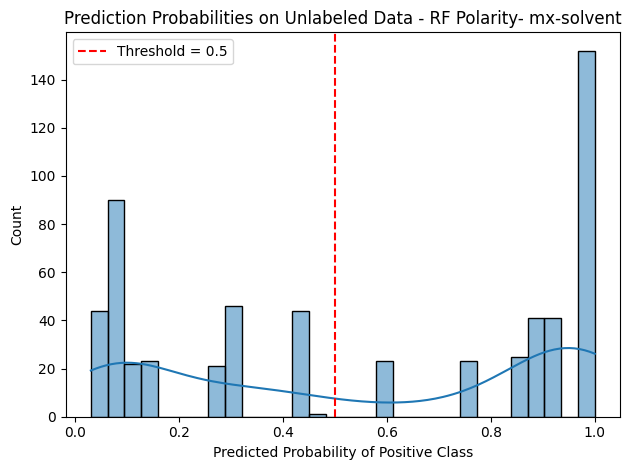

In [34]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data - RF Polarity- mx-solvent")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

                      solvent     mx  predicted_proba  method_lif/hcl  \
85   1-methylpyrrolidin-2-one  Ti3C2         1.000000               0   
240  1-methylpyrrolidin-2-one   V2C1         1.000000               0   
161  1-methylpyrrolidin-2-one  Nb2C1         1.000000               0   
613  1-methylpyrrolidin-2-one  Ta4C3         1.000000               1   
453  1-methylpyrrolidin-2-one  Zr3C2         1.000000               1   
373  1-methylpyrrolidin-2-one  Ti2C1         1.000000               1   
400  1-methylpyrrolidin-2-one  Ti2C1         1.000000               0   
640  1-methylpyrrolidin-2-one  Ta4C3         1.000000               0   
560  1-methylpyrrolidin-2-one   V4C3         1.000000               0   
480  1-methylpyrrolidin-2-one  Zr3C2         1.000000               0   
533  1-methylpyrrolidin-2-one   V4C3         1.000000               1   
320  1-methylpyrrolidin-2-one  Mo2C1         1.000000               0   
293  1-methylpyrrolidin-2-one  Mo2C1         1.0000

In [36]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent','predicted_proba', 'method_lif/hcl', 'method_licl/hf', 'method_hf']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx          solvent  predicted_proba  method_lif/hcl  method_licl/hf  \
92   Ti3C2  dichloromethane         0.030140               0               1   
171  Nb2C1  dichloromethane         0.030140               0               1   
330  Mo2C1  dichloromethane         0.030140               0               1   
570   V4C3  dichloromethane         0.030140               0               1   
650  Ta4C3  dichloromethane         0.030140               0               1   
303  Mo2C1  dichloromethane         0.030934               1               0   
543   V4C3  dichloromethane         0.030934               1               0   
144  Nb2C1  dichloromethane         0.030934               1               0   
623  Ta4C3  dichloromethane         0.030934               1               0   
250   V2C1  dichloromethane         0.031331               0               1   
410  Ti2C1  dichloromethane         0.031331               0

In [37]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    596.000000
mean       0.554548
std        0.383585
min        0.030140
25%        0.096697
50%        0.605463
75%        0.981725
max        1.000000
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)          156
Low (0.1–0.3)             60
Mid (0.3–0.5)             75
High (0.5–0.7)            23
Very High (0.7–0.9)       89
Extremely High (>0.9)    193
Name: count, dtype: int64


In [38]:
train_path = f"{drive_path}/master/mxene-solvent-nrc/code-data/training/final/polarity/"

In [39]:
df_unlabeled.to_csv(f"{train_path}/002_p_vs_n_predictions_unlabeled_polarity_rf-normalize-fintune-mxsolv.csv")
df_unlabeled.to_pickle(f"{train_path}/002_p_vs_n_predictions_unlabeled_polarity_rf-normalize-fintune-mxsolv.pkl")


                  feature  importance
41          boiling_point    0.298879
33                  xlogp    0.183306
34                   tpsa    0.175609
31                    x_n    0.141627
29                    x_e    0.054748
28                      p    0.049510
32       molecular_weight    0.027640
37  h_bond_acceptor_count    0.022310
30                    x_d    0.014633
35             complexity    0.013581


/tmp/ipython-input-3827308663.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')


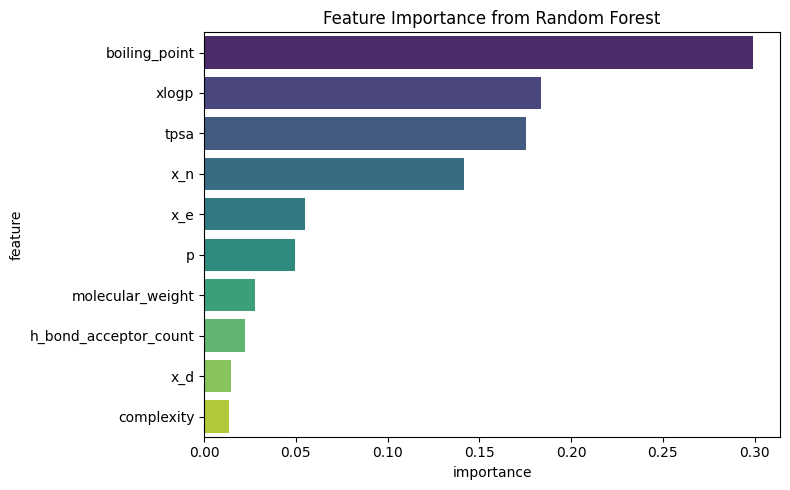

In [40]:
feature_names = X.columns

# Later, after training
importances = np.array([tree.feature_importances_ for tree in best_model.estimators_])
mean_importance = np.mean(importances, axis=0)

# Use saved feature_names directly
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_importance
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(10))

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()

In [41]:
mx_features = ['work_function_oh', 'formation_energy_oh', 'ehull_oh', 'alphax_el_oh',
       'alphay_el_oh', 'alphaz_el_oh', 'plasmafrequency_x_oh',
       'plasmafrequency_y_oh', 'has_inversion_symmetry_oh', 'gap_o',
       'work_function_o', 'formation_energy_o', 'ehull_o', 'alphax_el_o',
       'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o',
       'plasmafrequency_y_o', 'has_inversion_symmetry_o', 'work_function_f',
       'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f',
       'alphaz_el_f', 'plasmafrequency_x_f', 'plasmafrequency_y_f',
       'has_inversion_symmetry_f']
solv_features = ['p', 'x_e', 'x_d', 'x_n', 'boiling_point', 'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count',
       'h_bond_acceptor_count', 'rotatable_bond_count', 'heavy_atom_count',
       'atom_stereo_count']
# add_features = ['molecular_weight_additive', 'xlogp_additive', 'tpsa_additive',
      #  'complexity_additive', 'h_bond_donor_count_additive',
      #  'h_bond_acceptor_count_additive', 'rotatable_bond_count_additive',
      #  'heavy_atom_count_additive', 'atom_stereo_count_additive',
      #  'bond_stereo_count_additive', 'covalent_unit_count_additive']



In [42]:
top_mx = feature_importance_df[feature_importance_df['feature'].isin(mx_features)] \
            .sort_values(by='importance', ascending=False) \
            .head(5)

# Top 5 from Solvent features
top_solv = feature_importance_df[feature_importance_df['feature'].isin(solv_features)] \
              .sort_values(by='importance', ascending=False) \
              .head(5)

# top_add = feature_importance_df[feature_importance_df['feature'].isin(add_features)] \
#               .sort_values(by='importance', ascending=False) \
#               .head(5)

# Display
print("Total  MXene Features:", len(mx_features))
print("Top 5 MXene Features:")
print(top_mx.to_string(index=False))

print("\nTotal  Solvent Features:", len(solv_features))
print("Top 5 Solvent Features:")
print(top_solv.to_string(index=False))

# print("\nTotal  Additive Features:", len(add_features))
# print("Top 5 Additive Features:")
# print(top_solv.to_string(index=False))

Total  MXene Features: 28
Top 5 MXene Features:
                  feature  importance
                  ehull_f    0.000136
              alphay_el_f    0.000128
has_inversion_symmetry_oh    0.000000
          work_function_o    0.000000
                    gap_o    0.000000

Total  Solvent Features: 14
Top 5 Solvent Features:
      feature  importance
boiling_point    0.298879
        xlogp    0.183306
         tpsa    0.175609
          x_n    0.141627
          x_e    0.054748
